In [1]:
import tensorflow as tf
from tensorflow import keras

print("Tensorflow version ", tf.__version__)
print("Keras version ", keras.__version__)

Tensorflow version  2.10.0
Keras version  2.10.0


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## The Sequential API

This is basically a list, in which we stack components, of the model, layers, etc..

In [ ]:
# A Sequential Model

from tensorflow.keras import layers

model_1 = keras.Sequential(
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') # Classification problem
)

model_1.build(input_shape = (None,3)) 
# It is needed to first build the model,i.e initialize weights
# to see after its summary and contents
print(model_1.summary())
print()

model_1b = keras.Sequential(name = 'Model_1b') # A name can be given
model_1b.add(layers.Dense(64, activation = 'relu'))
model_1b.add(layers.Dense(10, activation = 'softmax'))

model_1b.build(input_shape = (None,3))
print(model_1b.summary())

In [ ]:

model_1c = keras.Sequential(name = 'Model_1c') # A name can be given
model_1c.add(keras.Input(shape = (3,))) # Shape of each sample
model_1c.add(layers.Dense(64, activation = 'relu'))
model_1c.add(layers.Dense(10, activation = 'softmax'))

model_1c.build(input_shape = (None,3))
print(model_1b.summary())

### Sequential API for Classification Task

Use any toy dataset like the Iris or the Fashion MNIST

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# Also we are going to set aside a validation dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, 
                                                      random_state = 0,shuffle = 'y')

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print('Full Train Shape: ', X_train_full.shape)
print('Test Shape: ', X_test.shape)
print('Train Shape: ', X_train.shape)
print('Validation Shape: ', X_valid.shape)

print('Each sample has a ' + str(X_train.shape[1]) + ' by ' + str(X_train.shape[2]) + ' shape' )

In [ ]:
# Standarize each pixel intensity is represented as a byte (0 to 255), so you can divide by 255 each sample 
# or use Scikit Learn MinMaxScaler(), depending on the input shapes expected by your neural network you will have to reshape
# your inputs

num_pipeline = make_pipeline(MinMaxScaler())

X_train_full_sc = num_pipeline.fit_transform(X_train_full.reshape(60000,28*28)).reshape(60000, 28, 28) # in order to make work the scaler it needs a 2d array
X_test_sc = num_pipeline.fit_transform(X_test.reshape(10000,28*28)).reshape(10000,28,28)

X_train_sc = num_pipeline.fit_transform(X_train.reshape(48000,28*28)).reshape(48000,28,28)
X_valid_sc = num_pipeline.fit_transform(X_valid.reshape(12000,28*28)).reshape(12000,28,28)




In [ ]:
X_train_full_sc[0]

In [ ]:
X_train_full_sc.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train_sc[0].reshape(28,28), cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

In [ ]:
# Build the model sequentially
model_class_fmnist = keras.models.Sequential()
model_class_fmnist.add(keras.layers.Flatten(input_shape =[28, 28]))
model_class_fmnist.add(keras.layers.Dense(300, activation="relu"))
model_class_fmnist.add(keras.layers.Dense(100, activation="relu"))
model_class_fmnist.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model_class_fmnist.summary()

In [ ]:
# Once the model is initialized with the inputs, we can retreive information from the different layers, like the weights
hidden1 = model_class_fmnist.layers[1]
hidden1.get_weights() # the iput are the weights and the biases

In [ ]:
model_class_fmnist.compile(loss="sparse_categorical_crossentropy",
                           optimizer="sgd",
                           metrics=["accuracy"])
history = model_class_fmnist.fit(X_train_sc, y_train, epochs=30,
                    validation_data=(X_valid_sc, y_valid))

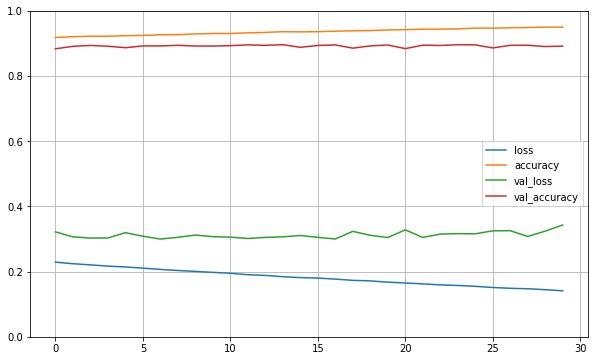

In [42]:
pd.DataFrame(history.history).plot(figsize = (10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
# Evaluate Model
model_class_fmnist.evaluate(X_valid_sc, y_valid)

375/375 [==============================] - 1s 3ms/step - loss: 0.3429 - accuracy: 0.8912


[0.3428519368171692, 0.8911666870117188]

In [59]:
# Predict
Y_pred = model_class_fmnist.predict(X_test_sc)

313/313 [==============================] - 1s 2ms/step


In [60]:
Y_pred

array([[9.5949008e-07, 1.9624995e-08, 4.4083474e-05, ..., 6.1849132e-03,
        2.5946820e-05, 9.9221230e-01],
       [1.2461774e-04, 7.4457933e-11, 9.9782664e-01, ..., 2.4111269e-13,
        8.2800926e-11, 8.8395206e-14],
       [1.5484053e-06, 9.9999845e-01, 2.5323346e-09, ..., 1.0974512e-13,
        1.9287512e-10, 6.8034724e-15],
       ...,
       [4.3130902e-04, 3.1621331e-10, 6.5354898e-04, ..., 1.4793233e-07,
        9.9864966e-01, 7.5844164e-11],
       [1.8306791e-06, 9.9998808e-01, 8.5397915e-08, ..., 2.6893270e-09,
        8.2711900e-09, 7.6113707e-08],
       [3.4705357e-07, 8.1160141e-07, 1.0987268e-05, ..., 2.4139062e-03,
        1.7030516e-05, 3.7035854e-06]], dtype=float32)

In [65]:
np.argmax(Y_pred, axis = 1) # Get position of max probability on every row in the predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [73]:
print(np.argmax(Y_pred, axis = 1))
print(y_test)
any(np.argmax(Y_pred, axis = 1) - y_test)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


True

### Sequential API for Regression Task

Neural Networks support natively either simple regression or multioutput regression.

You have to leave the last layer with the number of neurons equal to the number of intended predicted variables, and 
without any kind of activation function as we do in classification problems with sigmoid or softmax

In [3]:
from sklearn.datasets import fetch_california_housing # We use the California Dataset loaded in Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
housing = fetch_california_housing() # Predict the median, so it is a single output regression

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target,
                                                              test_size = 0.2, 
                                                              random_state = 0,shuffle = 'y')
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,
                                                      test_size = 0.2, 
                                                      random_state = 0,shuffle = 'y')

# Scale data
std_scaler = StandardScaler()
X_train_full_sc = std_scaler.fit_transform(X_train_full)
X_train_sc = std_scaler.fit_transform(X_train)
X_valid_sc = std_scaler.fit_transform(X_valid)
X_test_sc = std_scaler.fit_transform(X_test)

In [11]:
# Prepare model

def model_regression(input_shape):
    model = keras.models.Sequential([
        keras.layers.Dense(50, activation = 'relu', input_shape = input_shape),
        keras.layers.Dense(30, activation = 'relu'),
        keras.layers.Dense(1)
        
    ])
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

model_reg = model_regression(X_train_sc.shape[1:])

history_reg = model_reg.fit(X_train_sc,y_train, validation_data = (X_valid_sc, y_valid))



413/413 [==============================] - 2s 3ms/step - loss: 0.9948 - val_loss: 0.4644


In [12]:
mse_test = model_reg.evaluate(X_valid_sc, y_valid)

104/104 [==============================] - 0s 1ms/step - loss: 0.4644


In [18]:
y_pred = model_reg.predict(X_test_sc)

129/129 [==============================] - 0s 1ms/step


In [22]:
X_test_sc.shape

(4128, 8)

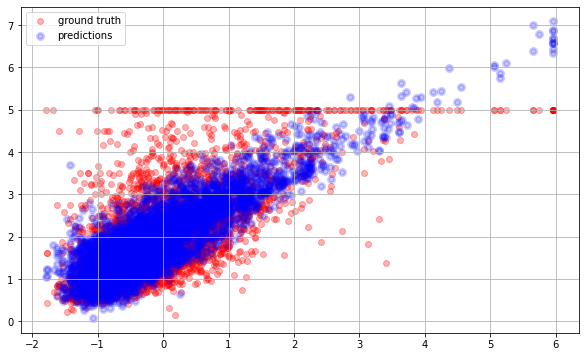

In [43]:
# plot R2
%matplotlib inline
fig, axes = plt.subplots(figsize=(10, 6))

# Plot outputs
plt.scatter(X_test_sc[:,0], y_test, color="red",alpha=0.3,label="ground truth")
plt.scatter(X_test_sc[:,0], y_pred, color="blue", linewidth=3,alpha=0.2,label="predictions")

plt.grid(True)
plt.legend()
plt.show()

## The Functional API

Uses Graph Architectures, represents a mid-point between easy to use and flexibility

In [4]:
# A simple functional model with two layers, this works by linking different parts outputs from predecing function
# become inputs of the following

inputs = keras.Input(shape=(3,), name = 'inputs')
features = layers.Dense(64, activation = 'relu', name = 'features')(inputs)
outputs = layers.Dense(10, activation = 'softmax', name = 'outputs')(features)

print(inputs.shape)
print(inputs.dtype)

print(features.shape)

model_func= keras.Model(inputs = inputs, outputs = outputs)
model_func.summary()

(None, 3)
<dtype: 'float32'>
(None, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 3)]               0         
                                                                 
 features (Dense)            (None, 64)                256       
                                                                 
 outputs (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
import netron
model_func.save('test.h5')
port = 8088
model_path = 'test.h5'
netron.start(model_path, port, browse=False)
#import IPython
#IPython.display.IFrame(f"http://localhost:{port}", width=1000, height=1000)

Serving 'test.h5' at http://localhost:8088


('localhost', 8088)

### Multi-Input / Multi-Output models

With perhaps the exception of simple regression or toy classification problems, dl models don´t look like stacks of simple layers, usually they have branches, with different types of inputs which need preprocessing, and later on are joined together into the model flow as a pipeline

In [13]:
vocabulary_size = 10000
n_tags = 100
n_depts = 4

# Define model inputs

title = keras.Input(shape = (vocabulary_size,), name = 'title')
text_body = keras.Input(shape = (vocabulary_size,), name = 'text_body')
tags = keras.Input(shape = (n_tags,), name = 'tags')

# Join input Features into a single tensor

features = keras.layers.Concatenate()([title, text_body, tags])
features = keras.layers.Dense(64, activation = 'relu')(features)

# Define outputs

priority = keras.layers.Dense(1, activation = 'sigmoid', name = 'priority')(features)
department = keras.layers.Dense(n_depts, activation = 'softmax', name = 'department')(features)

model_multi = keras.Model(inputs = [title, text_body, tags],
                         outputs = [priority, department])

# Training
import numpy as np

n_samples = 1500

# Dummy input data
title_data = np.random.randint(0, 2, size = (n_samples, vocabulary_size))
text_data = np.random.randint(0, 2, size = (n_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size = (n_samples, n_tags))

# Output dummy
prio_data = np.random.random(size = (n_samples, 1))
dept_data = np.random.randint(0, 2, size = (n_samples, n_depts))

model_multi.compile(optimizer = 'rmsprop',
             loss = ['mean_squared_error', 'categorical_crossentropy'],
             metrics = [['mean_absolute_error'], ['accuracy']])

inputs = [title_data,text_data, tags_data]
outputs = [prio_data, dept_data]

# In this dummy example we do not split among train, validation and test sets as we should do

model_multi.fit(inputs, outputs, epochs = 5, verbose = 1)
model_multi.evaluate(inputs, outputs)

priority_preds, department_preds = model_multi.predict([title_data, text_data, tags_data])


Epoch 1/5
47/47 [==============================] - 2s 23ms/step - loss: 31.1600 - priority_loss: 0.3386 - department_loss: 30.8214 - priority_mean_absolute_error: 0.5030 - department_accuracy: 0.2413
Epoch 2/5
47/47 [==============================] - 1s 24ms/step - loss: 34.4515 - priority_loss: 0.3437 - department_loss: 34.1078 - priority_mean_absolute_error: 0.5085 - department_accuracy: 0.2400
Epoch 3/5
47/47 [==============================] - 1s 24ms/step - loss: 40.5947 - priority_loss: 0.3437 - department_loss: 40.2510 - priority_mean_absolute_error: 0.5085 - department_accuracy: 0.2780
Epoch 4/5
47/47 [==============================] - 1s 25ms/step - loss: 51.9198 - priority_loss: 0.3437 - department_loss: 51.5761 - priority_mean_absolute_error: 0.5085 - department_accuracy: 0.2447
Epoch 5/5
47/47 [==============================] - 1s 7ms/step


In [16]:
# You can visualize the model using Netron, later you can add the png into this notebook
model_multi.save('multi.h5')
port = 8088
model_path = 'multi.h5'
netron.start()

Serving' at http://localhost:8080


('localhost', 8080)

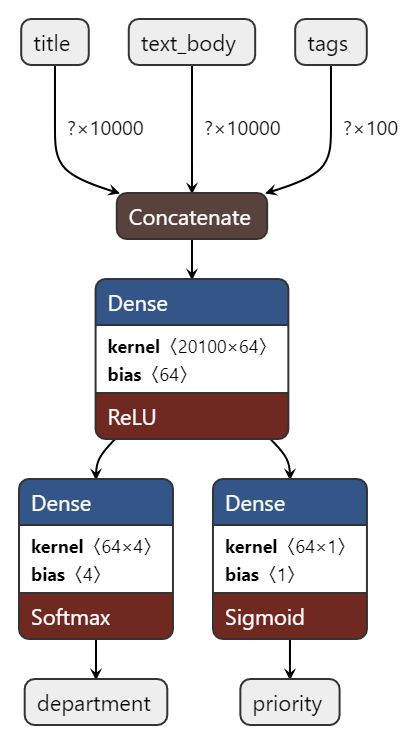

In [21]:
from IPython import display
display.Image("multi.png")

In [29]:
# Training a model by providing dicts of input & target arrays
model_multi.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model_multi.fit({"title": title_data, "text_body": text_data, "tags": tags_data},
          {"priority": prio_data, "department": dept_data},
          epochs=1)
model_multi.evaluate({"title": title_data, "text_body": text_data, "tags": tags_data},
               {"priority": prio_data, "department": dept_data})
priority_preds, department_preds = model_multi.predict(
    {"title": title_data, "text_body": text_data, "tags": tags_data})

47/47 [==============================] - 0s 7ms/step


 ### The Functional API used to created more complicated models with branches.
 
 Here we are going to provide more samples about the flexibility of the Funcional API. Contrary to the Sequential where we 
 stack layers, in the Functional API we can create ramifications, in order to tackle for instance the famous problem of the vanishing gradients.

## The Subclassing API

It is a low-level option where the user writes everything. Ideal for research if you want to control every part of the design, but without the Keras built-in features, more risk-prone and needs deep knowledge on how a deep learningframework works in order to identify bugs

When subclassing a Model in Keras do:
- In the __init__() method, define the layers to use
- In the call() method, defien the forward pass of the model, reusing the layers previously created.
- Instantiate the subclass and call it on the data to create its weights

In [22]:
class CustomerTicketModel(keras.Model):
    def __init__(self, n_depts):
        
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.features_layer_mix = layers.Dense(64, activation = 'relu', name = 'mix_layer')
        self.priority_scorer = layers.Dense(1, activation = 'sigmoid', name = 'priority')
        self.dept_classifier = layers.Dense(n_depts, activation = 'softmax', name = 'dept_class')
    
    def call(self, inputs):
        
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.features_layer_mix(features)
        priority = self.priority_scorer(features)
        department = self.dept_classifier(features)
        return priority, department

In [24]:
# Instantiate

model_subclassed = CustomerTicketModel(n_depts = 4)
priority, department = model_subclassed( {"title": title_data, "text_body": text_data, "tags": tags_data})

In [32]:
# Compile and train like in the Sequential of Functional model

model_subclassed.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model_subclassed.fit({"title": title_data,
           "text_body": text_data,
           "tags": tags_data},
          [prio_data, dept_data],
          epochs=1)
model_subclassed.evaluate({"title": title_data,
                "text_body": text_data,
                "tags": tags_data},
               [prio_data, dept_data])
priority_preds, department_preds = model_subclassed.predict({"title": title_data,
                                                  "text_body": text_data,
                                                  "tags": tags_data})

47/47 [==============================] - 0s 7ms/step


<b> In general using Functional Models that include subclassed layers, provides the best of both worlds: high development flexibility while retaining the advantages of the Functional API.

In [38]:
# Example a Functional Model that includes a subclassed model

class Classifier(keras.Model):
    # A Class to create the final output layer for classification
    
    def __init__(self, num_classes = 2):
        super().__init__()
        if (num_classes == 2):
            n_units = 1
            activation = 'sigmoid'
        else:
            n_units = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(n_units, activation = activation)
    
    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape = (3,))
features = layers.Dense(64, activation = 'relu')(inputs)
outputs = Classifier(num_classes = 10)(features)

model_hybrid = keras.Model(inputs = inputs, outputs = outputs)